In [61]:
from astropy.table import Table
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.io import ascii, fits
import astropy
from astropy.wcs import WCS
from astropy import wcs
from astropy import constants as const
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


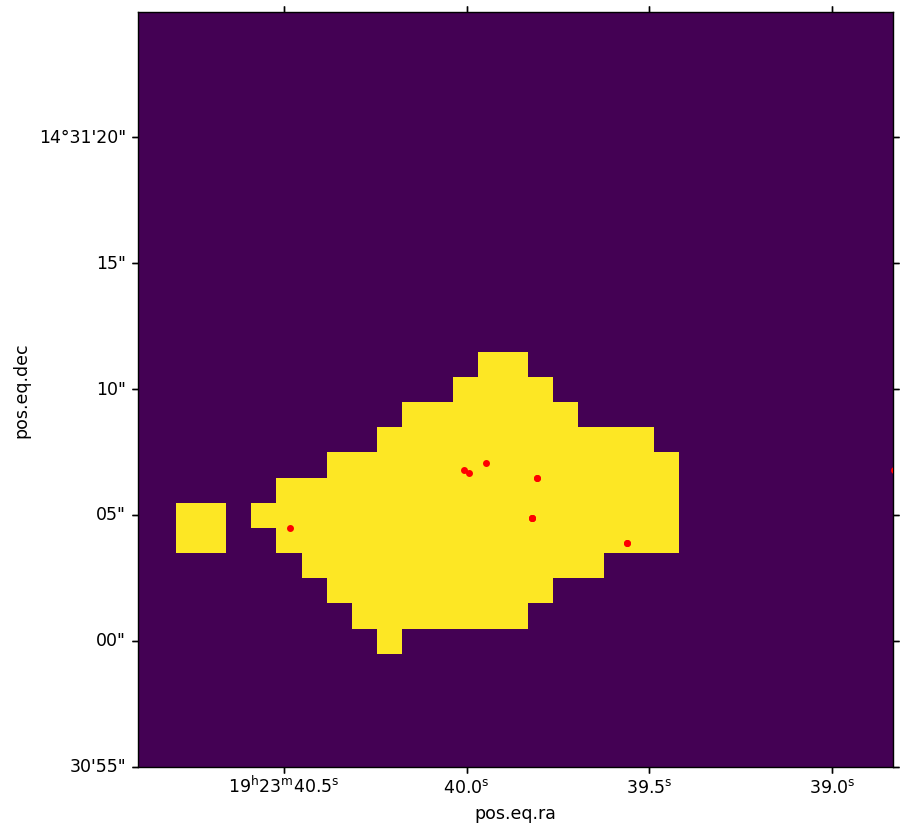

In [106]:

fp = '/Users/josh/GitHub/W51/'
###Retrieve source data###


#RUN ALMA_IMF_CAT.PY FIRST
cat_w51e = ascii.read('/Users/josh/GitHub/W51/data/W51-E.sw.sources.fin.ok_dec2020.cat', data_start=0, format='commented_header', header_start=110,  comment="!")
cat_w51irs2 = ascii.read('/Users/josh/GitHub/W51/data/W51-IRS2.sw.sources.fin.ok_dec2020.cat', data_start=0, format='commented_header', header_start=110, comment="!")


alma_imf_w51e_ra = cat_w51e['WCS_ACOOR']
alma_imf_w51e_dec = cat_w51e['WCS_DCOOR']
alma_imf_w51e_flux = cat_w51e['FXT_BST02']

alma_imf_irs2_ra = cat_w51irs2['WCS_ACOOR']
alma_imf_irs2_dec = cat_w51irs2['WCS_DCOOR']
alma_imf_irs2_flux = cat_w51irs2['FXT_BST02']



fp = '/Users/josh/GitHub/W51/'
catalog = Table.read(fp+'data/byeye_catalog.tex')
dendrocat = Table.read(fp+'data/dendro_catalog.tex')

cat_ra = [float(i) for i in catalog['PeakRA'][1:]]
cat_dec = [float(i) for i in catalog['PeakDec'][1:]]
cat_flux = catalog['peak']

dendrocat_ra = dendrocat['x_cen']
dendrocat_dec = dendrocat['y_cen']
dendrocat_flux = dendrocat['peak_cont_flux']

plt.figure(figsize=(8,8), dpi=125)
parmap = fits.open('/Users/josh/GitHub/W51/data/par_maps.fits')
bg = fits.open('/Users/josh/GitHub/W51/data/m0_44.fits')
ww_2 = wcs.WCS(bg[0].header).celestial
ww = wcs.WCS(parmap[0].header).celestial
plt.subplot(projection=ww_2)
ax = plt.gca()
#plt.imshow(parmap[0].data[0])
#plt.imshow(bg[0].data)
plt.imshow(mask)
plt.plot(cat_ra, cat_dec, 'r.', transform=ax.get_transform('world'))
#plt.plot(dendrocat_ra[1:], dendrocat_dec[1:], 'r.', transform=ax.get_transform('world'))
plt.xlim(170,200)
plt.ylim(180,210)
plt.show()

In [24]:
12 + 7

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [45]:
mask = bg[0].data > 23

<ipython-input-45-53b90f1535db>:1: RuntimeWarning: invalid value encountered in greater
  mask = bg[0].data > 23


In [46]:
mask * 1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

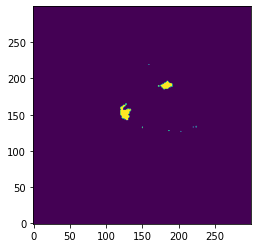

In [47]:
plt.imshow(mask, origin='lower')

In [65]:
cat_coords = SkyCoord

In [71]:
cat_pix = astropy.wcs.utils.skycoord_to_pixel(coords=cat_coords, wcs= ww_2)

In [69]:
cat_coords = SkyCoord(cat_ra, cat_dec, unit = u.deg)

In [74]:
mask * cat_coords

ValueError: operands could not be broadcast together with shapes (300,300) (77,) 

In [81]:
cat_pix[0]

array([173.01382669, 169.31390305, 143.31424032, 146.8142401 ,
       172.61403978, 142.21423515, 200.61375303, 149.11367527,
       202.11378736, 159.21370489, 148.31421486, 156.91349964,
       197.11391024, 200.91384904, 144.31357566, 156.71349341,
       199.11383645, 157.81359536, 201.2138412 , 200.01354011,
       159.91351486, 146.01430144, 141.41366529, 131.91372581,
       131.81372875, 210.91356011, 140.71365305, 138.41367927,
       203.91383026, 139.21368156, 155.81394661, 155.51350216,
       149.61368761, 144.11425331, 130.5139348 , 136.21373644,
       153.41383477, 176.013567  , 135.31373715, 157.81370589,
       151.51370088, 189.41357375, 157.2136913 , 135.21373529,
       157.31369726, 202.11378736, 160.21414253, 189.41357375,
       127.01386039, 207.81354355, 127.51405214, 124.71391175,
       156.01365833, 125.5140011 , 126.11401533, 128.31401189,
       125.5140011 , 128.71408094, 129.41404331, 127.214026  ,
       127.71405225, 127.51405214, 185.61356063, 203.81

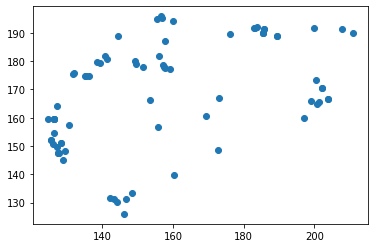

In [84]:
plt.scatter(cat_pix[0], cat_pix[1])